In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy as nd
from numpy import random
import pandas as pd
from pandas import Series
from IPython.display import Image, HTML, display
import os
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read the csv file into a pandas DataFrame

wine_data = pd.read_csv('./Data/wine.csv')
wine_data.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [3]:
# Assign the data to X and y

X = wine_data[["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", 
               "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality"]]
y = wine_data["high_quality"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6497, 12) (6497, 1)


In [4]:
# Add graphviz executables
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [5]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print(X_train, y_train)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1539            7.2             0.390         0.32            1.80      0.065   
1109           10.8             0.470         0.43            2.10      0.171   
100             8.3             0.610         0.30            2.10      0.084   
5477            6.5             0.350         0.31           10.20      0.069   
6416            5.8             0.385         0.25            3.70      0.031   
...             ...               ...          ...             ...        ...   
3772            7.6             0.320         0.58           16.75      0.050   
5191            5.6             0.280         0.27            3.90      0.043   
5226            6.4             0.370         0.20            5.60      0.117   
5390            6.5             0.260         0.50            8.00      0.051   
860             7.2             0.620         0.06            2.70      0.077   

      free_sulfur_dioxide  

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train.ravel())
rf.score(X_test, y_test)
feature_names = X.columns

In [9]:
# Calculate feature importance
importances = rf.feature_importances_
importances

array([0.00552263, 0.02798843, 0.01366567, 0.00812896, 0.01192527,
       0.01000035, 0.00896697, 0.02274745, 0.00598486, 0.00942406,
       0.06908965, 0.80655569])

In [10]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.8065556940507246, 'quality'),
 (0.0690896545187922, 'alcohol'),
 (0.027988430103248148, 'volatile_acidity'),
 (0.022747451208161473, 'density'),
 (0.013665674050385188, 'citric_acid'),
 (0.011925268955996741, 'chlorides'),
 (0.010000345143297694, 'free_sulfur_dioxide'),
 (0.009424058476946927, 'sulphates'),
 (0.008966971378041816, 'total_sulfur_dioxide'),
 (0.008128964902749673, 'residual_sugar'),
 (0.00598486091544094, 'pH'),
 (0.005522626296214565, 'fixed_acidity')]

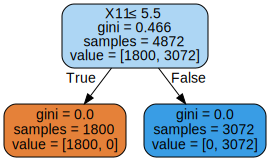

In [11]:
# Create a decision tree graph
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    #feature_names=y.feature_names,  
    #class_names=X.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('wine_quality.png')

graph = graphviz.Source(dot_data)  
graph

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train(-1, 1))

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()